# Volume 3: Pandas 3 (Grouping)
    Nathan Kibanoff
    BUDS Training Program
    14 August 2019

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydataset import data
%matplotlib inline

## Problem 1

The data *time_usage.txt* contains data on how Americans spend their time from 2007-2017.
Read in the data as a DataFrame object and use groupby() to filter through the DataFrame and answer the following questions:

1. How did the mean amount of time spent on all activities change over 2007 to 2017?

2. On average (using the mean), did Americans spend more time doing exercise or watching TV  over the past ten years? What was the difference?

(Hint: The column *Estimate* gives the amount of hours spent on an activity. The activity *Watching TV* contains data on Americans watching TV and the activity *Participating in Sports Exercise and Rec Activity* contains data on Americans exercising.)

In [6]:
time=pd.read_csv("time_usage.txt")
yr=time[time["Activity"]!="Total Hours"].groupby("Year")
print(yr["Estimate"].describe()["mean"])
print("Mean amount of time in doing activities had a generally decreasing trend from 2007-2010\n")

acts=time.groupby("Activity")
print(acts["Estimate"].describe()["mean"])
print("Americans spent",2.762727-0.306364,"more hours in watching TV than exercising")

Year
2007.0    1.479655
2008.0    1.477586
2009.0    1.477241
2010.0    1.472414
2011.0    1.473448
2012.0    1.478621
2013.0    1.474483
2014.0    1.217143
2015.0    1.479655
2016.0    1.479655
2017.0    1.476207
Name: mean, dtype: float64
Mean amount of time in doing activities had a generally decreasing trend from 2007-2010

Activity
Attending Class                                       0.263636
Caring for Children                                   0.407273
Caring for Non-household Adults                       0.068182
Consumer Goods Purchases                              0.367273
Eating and Drinking                                   1.214545
Educational Activities                                0.466364
Food Prep and Cleanup                                 0.561818
Helping Household Members                             0.522727
Helping Non-household Members                         0.199091
Homework and Research                                 0.163636
Household Activities           

## Problem 2

Use the time usage data to answer the following questions. Support your claims with readable, labeled visualizations.

1. In what activity did Americans spend most of their time in 2017?

2. In what year did Watching TV increase the most? What about Volunteering?

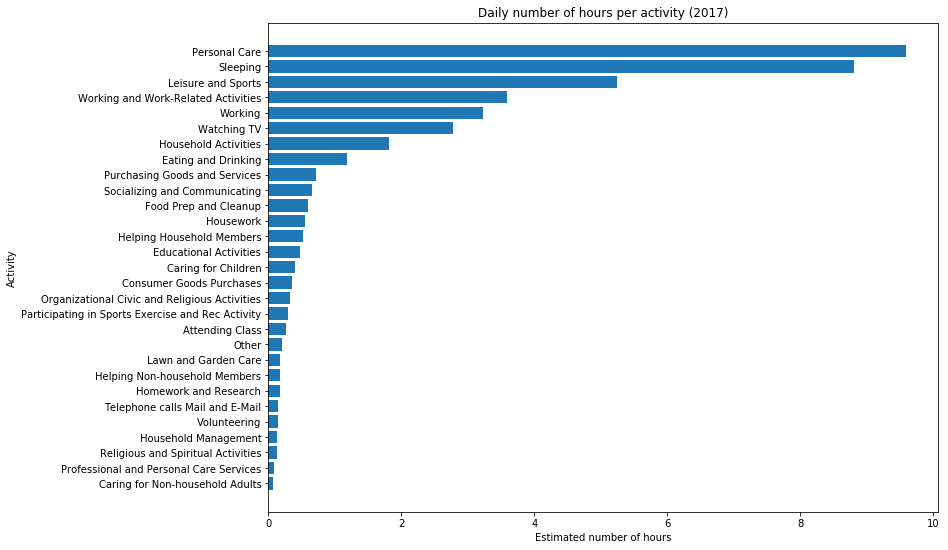

In 2017, Americans spent most of their time in personal care, with an average of 9.59 hours per day


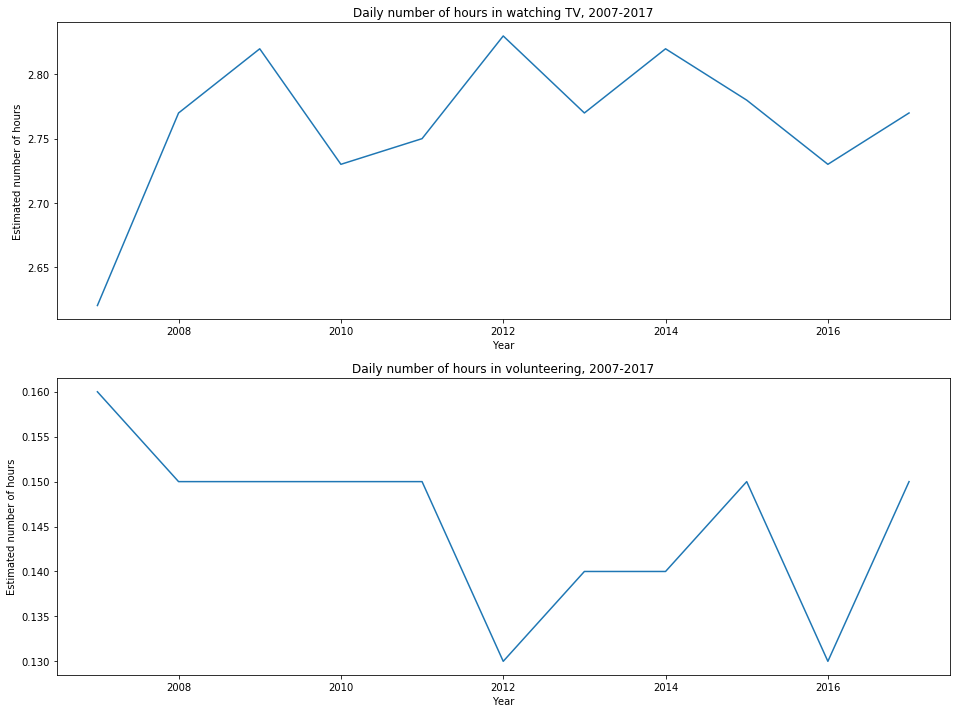

From 2007-2008, the daily number of hours that Americans spend in watching TV increased the most by 0.15 hours
As for the number of hours in volunteering, the largest increase was recorded from 2016-2017 by 0.02 hours


In [4]:
acts2017=time[(time["Year"]==2017) & (time["Activity"]!="Total Hours")][["Activity","Estimate"]].sort_values("Estimate")
plt.figure(figsize=(12,9))
plt.barh(acts2017["Activity"],acts2017["Estimate"])
plt.title("Daily number of hours per activity (2017)")
plt.ylabel("Activity")
plt.xlabel("Estimated number of hours")
plt.show()
print("In 2017, Americans spent most of their time in personal care, with an average of 9.59 hours per day")

tv=time[time["Activity"]=="Watching TV"][["Year","Estimate"]]
vol=time[time["Activity"]=="Volunteering"][["Year","Estimate"]]
plt.figure(figsize=(16,12))

plt.subplot(211)
plt.plot(tv[["Year"]],tv[["Estimate"]],label="Watching TV")
plt.title("Daily number of hours in watching TV, 2007-2017")
plt.xlabel("Year")
plt.ylabel("Estimated number of hours")

plt.subplot(212)
plt.plot(vol[["Year"]],vol[["Estimate"]],label="Volunteering")
plt.title("Daily number of hours in volunteering, 2007-2017")
plt.xlabel("Year")
plt.ylabel("Estimated number of hours")

plt.show()
print("From 2007-2008, the daily number of hours that Americans spend in watching TV increased the most by 0.15 hours")
print("As for the number of hours in volunteering, the largest increase was recorded from 2016-2017 by 0.02 hours")

## Problem 3

The file *Ohio_1999.csv* contains data on workers in Ohio in the year 1999. Use pivot tables to answer the following questions:

1. What was the highest paid race/sex combination? What was the lowest paid?

2. What race/sex combination worked the least amount of hours? What from the data explains why?

3. What race/sex combination works the most hours per week per person?

Some useful keys for the information are:

1. In column *Sex*, {1: male, 2: female}

2. In column *Race*, {1: White, 2: African-American, 3: Native American/Eskimo, 4: Asian}

In [7]:
ohio=pd.read_csv("Ohio_1999.csv")
salary=ohio.pivot_table(values="Yearly Salary",index=["Race","Sex"])
print(salary)
print("Highest paid: Asian males")
print("Lowest paid: African-American females\n")

total_hours=ohio.pivot_table(values="Usual Hours Worked",index=["Race","Sex"])
print(total_hours)
print("Least amount of hours worked: Native American/Eskimo females because they have a relatively low population")
print("Most amount of hours worked: White males")

          Yearly Salary
Race Sex               
1    1     47564.566745
     2     30867.947917
2    1     32872.067797
     2     26615.897059
3    1     53000.000000
     2     29000.000000
4    1     54347.066667
     2     36477.777778
Highest paid: Asian males
Lowest paid: African-American females

          Usual Hours Worked
Race Sex                    
1    1             43.254098
     2             40.512153
2    1             40.372881
     2             38.000000
3    1             48.666667
     2             40.000000
4    1             38.666667
     2             40.555556
Least amount of hours worked: Native American/Eskimo females because they have a relatively low population
Most amount of hours worked: White males


## Problem 4

Use the employment data from Ohio in 1999 to answer the following questions:

1. The column *Educational Attainment* contains numbers 0-46. Any number less than 39 means the person did not get any form of degree. 39-42 refers to either a high-school or associate's degree. A number greater than 43 means the person got at least a bachelor's degree. What is the most common degree among workers?

2. Partition the *Age* column into 4 equally populated intervals. Which interval contains the most workers with no degree? A degree that is less than a bachelor's degree? A bachelor's degree or higher?

3. What age/degree combination has the greatest yearly salary on average?

In [100]:
educ=pd.cut(ohio["Educational Attainment"],[0,38,42,46])
ohio_educ=ohio.groupby(educ)
print(ohio_educ["Educational Attainment"].describe()[["count"]])
print("Most of the Ohio workers have either a high school or associate's degree\n")

age=pd.qcut(ohio["Age"],4)
ohio_age=ohio.pivot_table(values="Yearly Salary",index=[age,educ],aggfunc="count") #rename column
print(ohio_age)
print("Workers aged 50-85 have the most number of people with no degree (total of 26)")
print("Workers aged 16-32 have the most number of people with less than a bachelor's degree (total of 300)")
print("Workers aged 33-40 have the most number of people with at least a bachelor's degree (total of 141)\n")

print(ohio.pivot_table(values="Yearly Salary",index=[age,educ]))
print("Among the Ohio workers, those who are aged 50-85 with at least a bachelor's degree have the greatest average "+
      "yearly salary\n($75,260.10)")

                        count
Educational Attainment       
(0, 38]                  88.0
(38, 42]                967.0
(42, 46]                530.0
Most of the Ohio workers have either a high school or associate's degree

                                       Yearly Salary
Age            Educational Attainment               
(15.999, 32.0] (0, 38]                            24
               (38, 42]                          276
               (42, 46]                          130
(32.0, 40.0]   (0, 38]                            17
               (38, 42]                          222
               (42, 46]                          141
(40.0, 49.0]   (0, 38]                            21
               (38, 42]                          250
               (42, 46]                          139
(49.0, 85.0]   (0, 38]                            26
               (38, 42]                          219
               (42, 46]                          120
Workers aged 50-85 have the most n

## Problem 5

The *pydataset* contains a data set *iris*, which contains the measurements of various flower species.
Use this data to answer the following questions:

1. Which flower species is the easiest distinguish and why?

2. What is the correlation between petal and sepal size for each species?

In [11]:
iris=data("iris")
iris_species=iris.pivot_table(index="Species")
print(iris_species)
print("The setosa species is the easiest to distinguish because its average petal size is significantly smaller than the\n"+
     "average petal sizes of the other two species in the dataset\n")

print("Setosa correlations")
print(iris[iris["Species"]=="setosa"].corr(),"\n")

print("Versicolor correlations")
print(iris[iris["Species"]=="versicolor"].corr(),"\n")

print("Virginica correlations")
print(iris[iris["Species"]=="virginica"].corr(),"\n")

print("For the setosa species, there is a high positive correlation between sepal length and sepal width")
print("For the versicolor species, there is a high positive correlation between sepal length and petal length, and as well as\n"+
      "petal length and petal width, while the correlation for the other sizes are moderate")
print("For the virginica species, there is a high positive correlation between sepal length and petal length, and a moderate\n"+
     "correlation for sepal length/width and sepal/petal width")

            Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
Species                                                         
setosa             1.462        0.246         5.006        3.428
versicolor         4.260        1.326         5.936        2.770
virginica          5.552        2.026         6.588        2.974
The setosa species is the easiest to distinguish because its average petal size is significantly smaller than the
average petal sizes of the other two species in the dataset

Setosa correlations
              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000     0.742547      0.267176     0.278098
Sepal.Width       0.742547     1.000000      0.177700     0.232752
Petal.Length      0.267176     0.177700      1.000000     0.331630
Petal.Width       0.278098     0.232752      0.331630     1.000000 

Versicolor correlations
              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000     0.525911      0.75404